<center>
  <h1 style="background-color:white; color:blue; font-size:35px; font-weight:bold; font-family:Times New Roman; border:2px solid black; text-align:center;">Data Science internship by CodSoft</h1>
</center>

<center>
  <h1 style="background-color:white; color:blue; font-size:30px; font-weight:bold; font-family:Times New Roman; border:2px solid black; text-align:center;">MOVIES RATING PREDICTION</h1>
</center>

### **Subject of this Python Script:  Movie Rating Prediction**         
##### **Authored by: Taha Ehsan Ullah Butt**
Where to contact: tahapsycho07@gmail.com                    ||
**[Github Account](https://github.com/codebytaha/)**        ||
**[Linkedin Account](https://www.linkedin.com/in/taha-the-data-analyst/)**


-----

#### <center>
  <h1 style="background-color:white; color:blue; font-size:25px; font-weight:bold; font-family:Times New Roman; border:2px solid black; text-align:center;">Table Of Content:</h1>
</center>



* [1. Importing Libraries](#1--importing-necessary-libraries)
* [2. Data Exploration](#2--data-preprocessing)
* [3. Exploratory Data Analysis](#3--exploratory-data-analysis)
* [4. Feature Engineering](#4--feature-engineering)
* [5. Model Building](#5--model-building)
* [6. Model Evaluation](#6--model-evaluation)
* [7. Model Deployement](#7--model-deployement)

## <font color="orange"><b>1- Importing Necessary Libraries</b></font>

In [213]:
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# modeling
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [214]:
# Read the CSV file with correct encoding
df = pd.read_csv('./dataset/IMDb Movies India.csv', encoding='latin1')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


## <font color="orange"><b>2- Data Preprocessing</b></font>

In [ ]:
df.info()

In [216]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [217]:
df.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [218]:
df['Director'].value_counts()

Director
Jayant Desai        58
Kanti Shah          57
Babubhai Mistry     50
Mahesh Bhatt        48
Master Bhagwan      47
                    ..
Naeem Siddiqui       1
Shadaab Khan         1
Mystelle Brabbee     1
Kunal Shivdasani     1
Kiran Thej           1
Name: count, Length: 5938, dtype: int64

In [219]:
df['Actor 1'].value_counts()

Actor 1
Ashok Kumar           158
Dharmendra            140
Jeetendra             140
Mithun Chakraborty    133
Amitabh Bachchan      129
                     ... 
Vatsal Sheth            1
Ujala Baboria           1
Dimple Sewak            1
Komal Leels             1
Sangeeta Tiwari         1
Name: count, Length: 4718, dtype: int64

In [220]:
# As we are going to predict movie ratings based on features, we need to remove null values from features that can directly influence the results.
df.dropna(subset=['Name','Year','Duration','Votes','Rating'],inplace=True) 
df.isna().sum()

Name          0
Year          0
Duration      0
Genre        31
Rating        0
Votes         0
Director      1
Actor 1      75
Actor 2     117
Actor 3     163
dtype: int64

In [221]:
# Remove parentheses from 'Year' column and convert to integer
df['Year'] = df['Year'].str.strip('()').astype(int)

In [222]:
# removing unnecessary special characters in Name Column
df['Name'] = df['Name'].str.replace('#', '').astype(str)
df['Name'] = df['Name'].str.replace('...', '').astype(str)
df['Name'] = df['Name'].str.replace('?:', '').astype(str)
df['Name'] = df['Name'].str.replace('.', '').astype(str)
df['Name'] = df['Name'].str.replace('@', '').astype(str)
df['Name'] = df['Name'].str.replace('1:1.6 ', '').astype(str)
df['Name'] = df['Name'].str.replace('1:13:7 ', '').astype(str)


In [223]:
df.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,Gadhvi (He thought he was Gandhi),2019,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,Yaaram,2019,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,Aur Pyaar Ho Gaya,1997,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,Yahaan,2005,142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,A Question Mark,2012,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,Andheri,2014,116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon
10,1:16 An Ode to Lost Love,2004,96 min,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni
11,Ek Tera Saath,2016,120 min,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani
12,100 Days,1991,161 min,"Horror, Romance, Thriller",6.5,983,Partho Ghosh,Jackie Shroff,Madhuri Dixit,Javed Jaffrey
13,100% Love,2012,166 min,"Comedy, Drama, Romance",5.7,512,Rabi Kinagi,Jeet,Koyel Mallick,Sujoy Ghosh


In [224]:
# Remove commas from 'Votes' column and convert to integer
df['Votes'] = df['Votes'].str.replace(',', '').astype(int)

In [225]:
# Remove min from 'Duration' column andDurationonvert to integer
df['Duration'] = df['Duration'].str.replace('min', '').astype(int)

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5851 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5851 non-null   object 
 1   Year      5851 non-null   int32  
 2   Duration  5851 non-null   int32  
 3   Genre     5820 non-null   object 
 4   Rating    5851 non-null   float64
 5   Votes     5851 non-null   int32  
 6   Director  5850 non-null   object 
 7   Actor 1   5776 non-null   object 
 8   Actor 2   5734 non-null   object 
 9   Actor 3   5688 non-null   object 
dtypes: float64(1), int32(3), object(6)
memory usage: 434.3+ KB


In [227]:
df.describe()

,Year,Duration,Rating,Votes
count,5851.000000,5851.000000,5851.000000,5851.000000
mean,1996.416852,132.294480,5.931875,2611.273116
std,19.914640,26.555826,1.389942,13433.828528
min,1931.000000,21.000000,1.100000,5.000000
25%,1983.000000,117.000000,5.000000,28.000000
50%,2002.000000,134.000000,6.100000,119.000000
75%,2013.000000,150.000000,7.000000,862.500000
max,2021.000000,321.000000,10.000000,591417.000000


In [228]:
# Drop Genre column 
df.drop('Genre',axis=1,inplace=True)

In [229]:
df.head()

,Name,Year,Duration,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,Gadhvi (He thought he was Gandhi),2019,109,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,Yaaram,2019,110,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,Aur Pyaar Ho Gaya,1997,147,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,Yahaan,2005,142,7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,A Question Mark,2012,82,5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


##  <font color="orange"><b>3- Exploratory Data Analysis:</b></font>

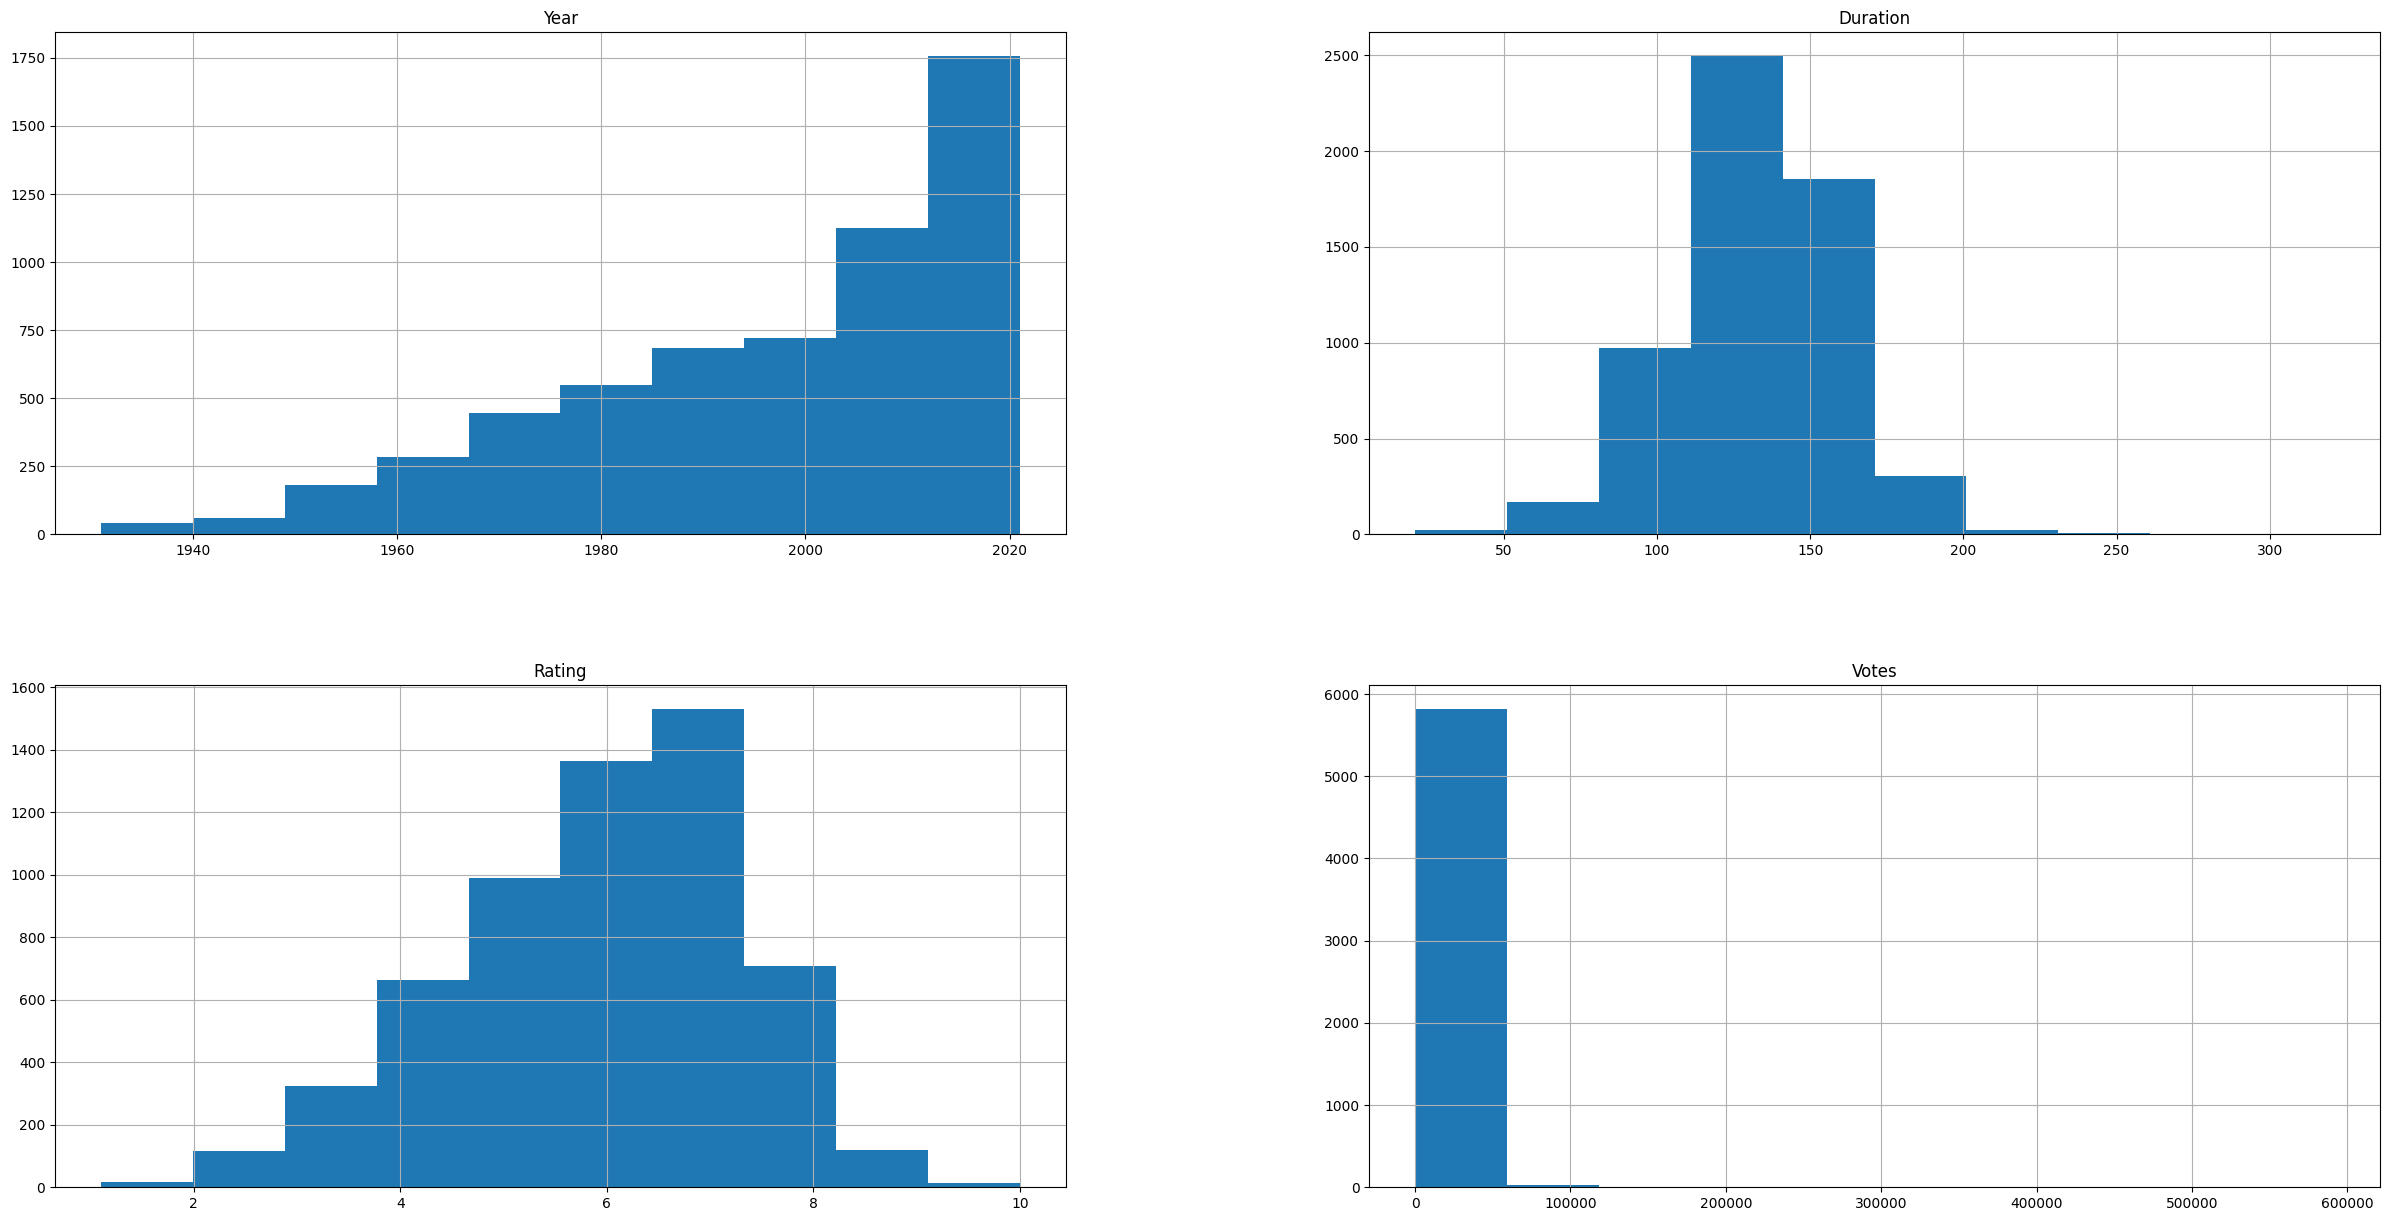

In [230]:
df.hist(figsize=(30, 15))
None

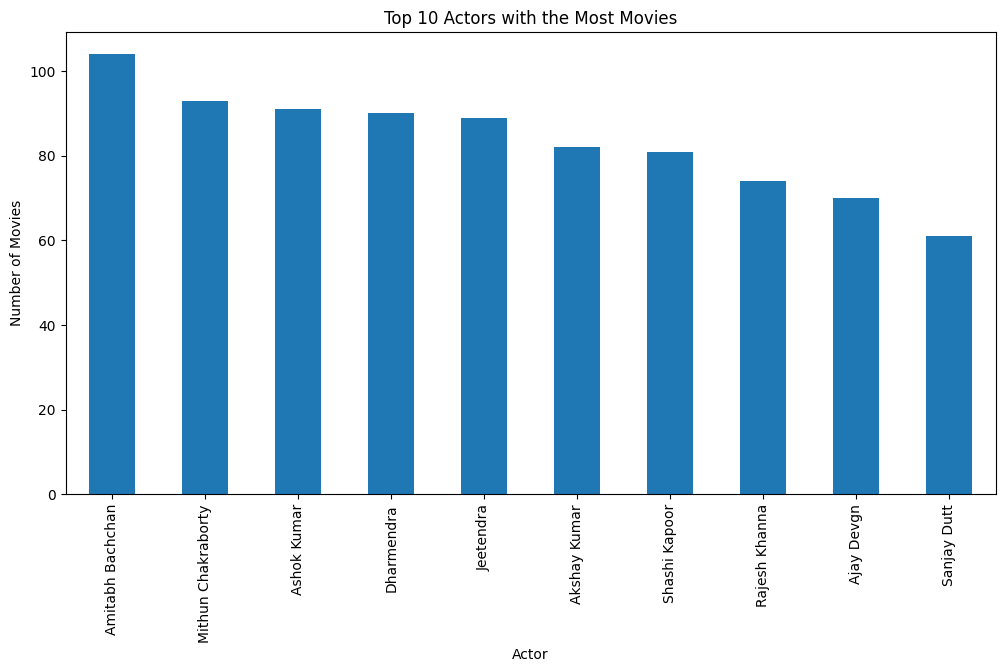

In [231]:
# Actor with the most movies

plt.figure(figsize=(12, 6))

# Count the number of movies for each actor, sort in descending order, and select the top 10
top_actors = df['Actor 1'].value_counts().sort_values(ascending=False).head(10)

# Create a bar plot for the top 10 actors with the most movies
top_actors.plot(kind='bar')
plt.title('Top 10 Actors with the Most Movies')
plt.xlabel('Actor')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)  # Rotate actor names for better visibility
plt.show()


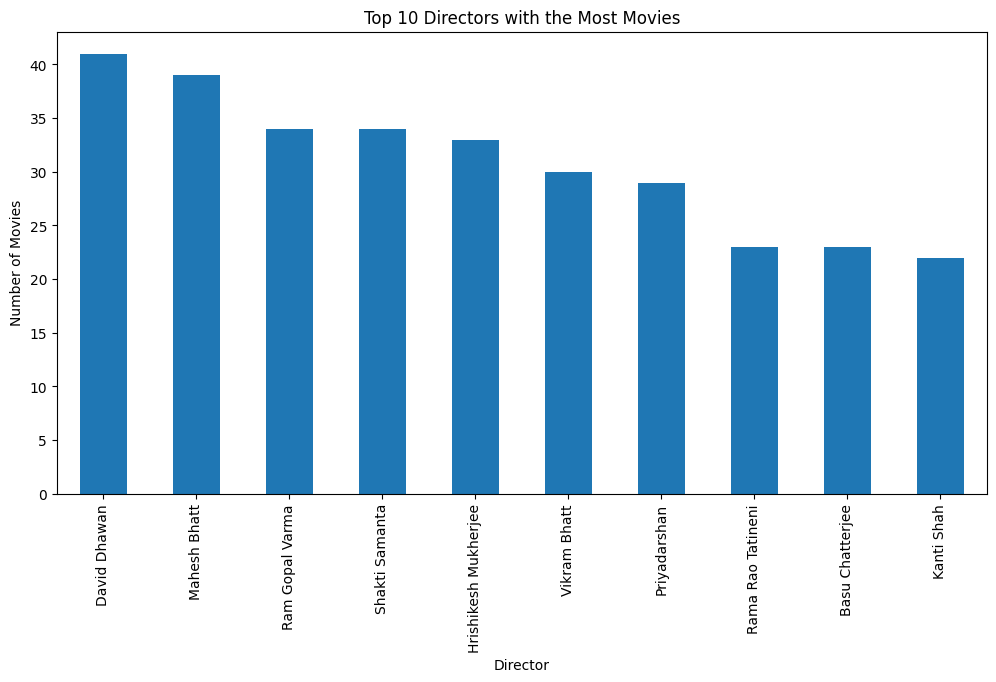

In [232]:
# Director with the most movies

plt.figure(figsize=(12, 6))

# Count the number of movies for each director, sort in descending order, and select the top 10
top_directors = df['Director'].value_counts().sort_values(ascending=False).head(10)

# Create a bar plot for the top 10 directors with the most movies
top_directors.plot(kind='bar')
plt.title('Top 10 Directors with the Most Movies')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)  # Rotate director names for better visibility
plt.show()


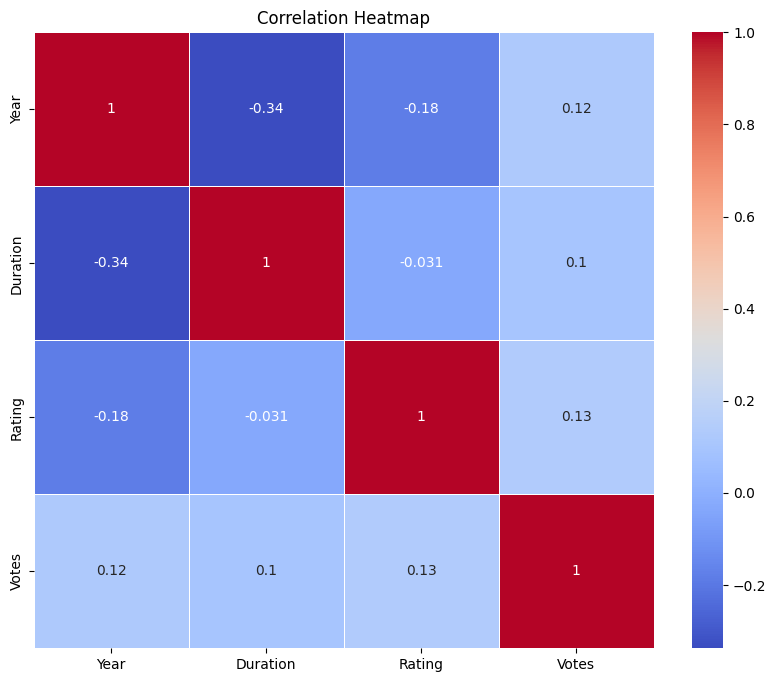

In [233]:
# Heatmap
correlation_matrix = df[['Year', 'Duration', 'Rating', 'Votes']].corr()

plt.figure(figsize=(10, 8))  # Set the size of the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)

plt.title("Correlation Heatmap")
plt.show()

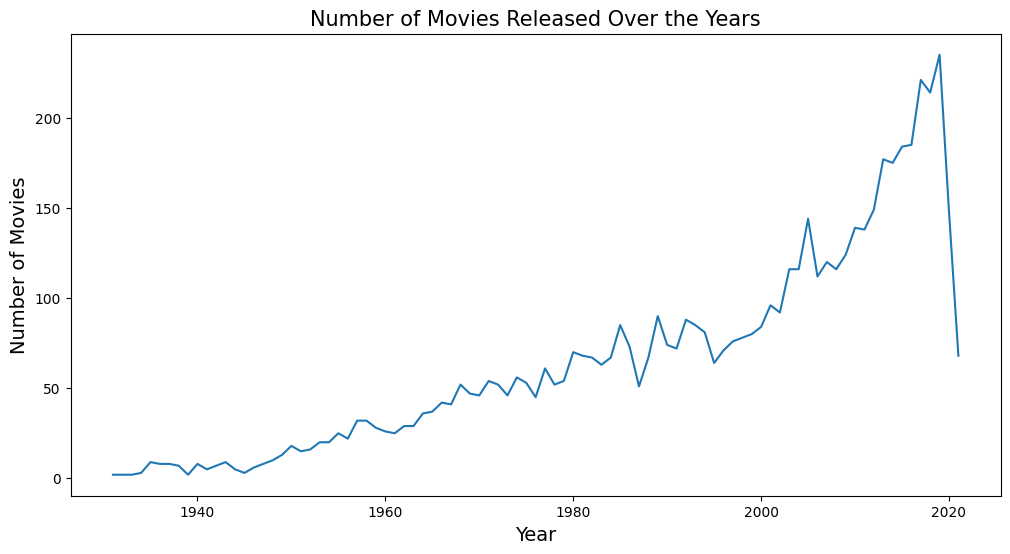

In [234]:
# Time series plot to visualize no of movie release over the year

df['Year'] = df['Year'].astype(int)

# Group data by year and calculate the count of movies for each year
movies_by_year = df.groupby('Year').size()

# Create a time series plot for the number of movies released over the years
plt.figure(figsize=(12, 6))
plt.plot(movies_by_year.index, movies_by_year.values)
plt.title('Number of Movies Released Over the Years', fontsize = 15)
plt.xlabel('Year', fontsize =14)
plt.ylabel('Number of Movies', fontsize= 14)
plt.show()


In [235]:
# top 20 highly rated actors

top_20_rated_movies_of_actor=df[(df['Rating']>=7)]['Actor 1'].head(20)

In [ ]:
top_20_actor=df.groupby(top_20_rated_movies_of_actor)['Rating'].mean()
top_20_actor

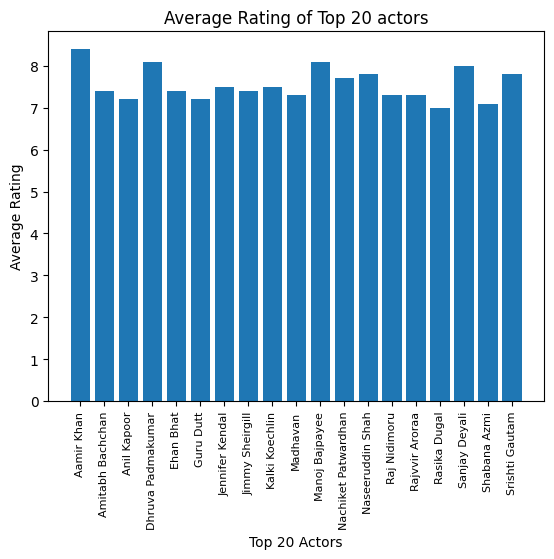

In [237]:
plt.bar(top_20_actor.index,top_20_actor.values)
plt.xlabel("Top 20 Actors")
plt.ylabel("Average Rating")
plt.title("Average Rating of Top 20 actors")
plt.xticks(rotation='vertical', fontsize=8)
plt.show()

In [238]:
# Create a new DataFrame for the genre 
d = pd.read_csv('./dataset/IMDb Movies India.csv', encoding='latin1')

genre_data = d[['Genre']].copy()

# Drop rows with missing values in the 'Genre' column
genre_data.dropna(subset=['Genre'], inplace=True)

# Combine all genres into a single string, separated by commas
all_genres = ",".join(genre_data['Genre'].tolist())

# Split the combined string to get a list of all genres
genre_list = all_genres.split(",")

# Use a set to collect unique genres after stripping spaces
unique_genres = set(genre.strip() for genre in genre_list)

# Convert the set of unique genres back to a list
unique_genres = list(unique_genres)

# Print the unique genre names
print(unique_genres)


['Biography', 'Horror', 'Animation', 'Short', 'Reality-TV', 'Western', 'News', 'Crime', 'Fantasy', 'Drama', 'Musical', 'History', 'Comedy', 'Adventure', 'Action', 'Family', 'Sport', 'Music', 'Documentary', 'War', 'Sci-Fi', 'Romance', 'Mystery', 'Thriller']


In [239]:
 # Split the 'Genre' column by commas and create a list of genres for each row
d['Genre'] = d['Genre'].str.split(', ')

# Create a new DataFrame to store the expanded genre data
genre_data = d.explode('Genre')

# Calculate the count of movies for each genre
genre_counts = genre_data['Genre'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']

# Calculate the mean rating for each genre
genre_mean_ratings = genre_data.groupby('Genre')['Rating'].mean().reset_index()
genre_mean_ratings.columns = ['Genre', 'Mean Rating']

# Merge the counts and mean ratings into a single DataFrame
genre_stats = pd.merge(genre_counts, genre_mean_ratings, on='Genre')

# Display the resulting DataFrame
print(genre_stats)


          Genre  Count  Mean Rating
0         Drama   7243     5.998558
1        Action   3543     5.430365
2       Romance   2449     5.750533
3        Comedy   2029     5.737290
4      Thriller   1713     5.536187
5         Crime   1322     5.727813
6        Family    943     6.195173
7       Musical    589     6.156627
8     Adventure    541     5.816839
9        Horror    524     4.785000
10      Mystery    513     5.801892
11      Fantasy    458     5.819512
12  Documentary    383     7.613287
13    Biography    208     6.819718
14      History    207     6.804688
15    Animation    125     5.956164
16        Music     90     6.137705
17        Sport     70     6.494118
18       Sci-Fi     58     5.272973
19          War     47     6.041176
20         News      9     7.250000
21      Western      5     5.566667
22   Reality-TV      3          NaN
23        Short      1          NaN


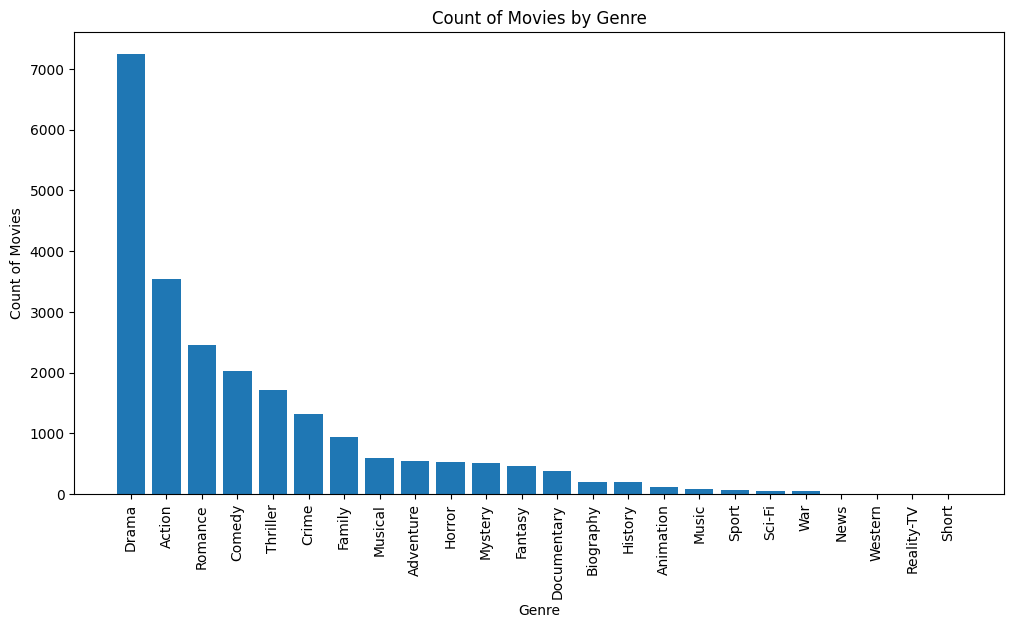

In [240]:
# Sort the DataFrame by count in descending order for better visualization
genre_stats = genre_stats.sort_values(by='Count', ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(genre_stats['Genre'], genre_stats['Count'])
plt.xlabel('Genre')
plt.ylabel('Count of Movies')
plt.title('Count of Movies by Genre')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


----

##  <font color="red"><b>4- Feature Engineering</b></font>

In [241]:
df.drop(['Name','Director','Actor 1','Actor 2','Actor 3'], axis=1,inplace=True)
df.head()

,Year,Duration,Rating,Votes
1,2019,109,7.0,8
3,2019,110,4.4,35
5,1997,147,4.7,827
6,2005,142,7.4,1086
8,2012,82,5.6,326


In [242]:
X = df[['Year','Duration','Votes']]
y = df['Rating']

In [243]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1000)

### <font color="red"><b>5- Model Building:</b></font>

In [244]:
# Create a pipeline with standard scaling and SGD regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('sgd', SGDRegressor(max_iter=10000, random_state=1000))
])

In [245]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('sgd', SGDRegressor(max_iter=10000, random_state=1000))])

In [246]:
# Predict ratings on the test set
y_pred_pipeline = pipeline.predict(X_test)

### <font color="red"><b>6- Model Evaluation</b></font>

In [247]:
# Evaluation Metrics for the Pipeline
mae_pipeline = mean_absolute_error(y_test, y_pred_pipeline)
mse_pipeline = mean_squared_error(y_test, y_pred_pipeline)
r2_pipeline = r2_score(y_test, y_pred_pipeline)

In [248]:
print("Pipeline Mean Absolute Error:", mae_pipeline)
print("Pipeline Mean Squared Error:", mse_pipeline)
print("Pipeline R-squared:", r2_pipeline)

Pipeline Mean Absolute Error: 1.040142363499226
Pipeline Mean Squared Error: 1.75589466147756
Pipeline R-squared: 0.037929023872087186


## <font color="green"><b>7- Model Deployement</b></font>

In [249]:
# Write Year, Duration and Votes to Check the Rating

new_input = pd.DataFrame({
    'Year': [2005],          # Replace with the desired year

    'Duration': [110],       # Replace with the desired duration in minutes

    'Votes': [100000],        # Replace with the desired number of votes
})


In [250]:
# Run this Cell to Check the prediction:

#  Use the trained pipeline to make predictions on the input
predicted_rating = pipeline.predict(new_input)

predicted_rating = float(predicted_rating)  # Convert to float
rounded_rating = round(predicted_rating, 2)

print("Predicted Rating:", rounded_rating)

Predicted Rating: 7.97
